In [64]:
import pandas as pd
import sympy as sym
from sympy import *
import numpy as np
import sympy.plotting.plot as symplot
import matplotlib.pyplot as plt
import math

## Gradient Decent using math

In [65]:
x = sym.symbols('x')
fx = 3 * x**2 - (3* x) + 4


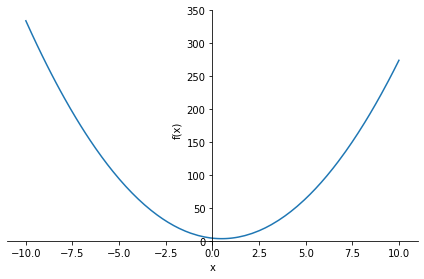

In [66]:
symplot(fx)

In [67]:
dfx = sym.diff(fx)
print(dfx)

6*x - 3


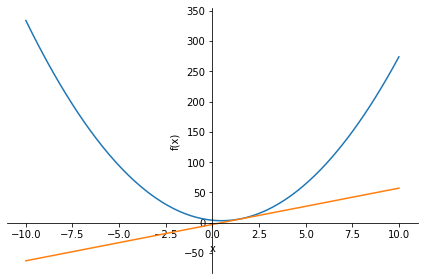

In [68]:
symplot(fx, dfx)

In [69]:
xx = np.linspace(-10,10,100)
fxx = sym.lambdify(x,fx)
dfxx = sym.lambdify(x, dfx)

In [70]:
# z = fxx(xx, yy)
# z

In [71]:
critical_x = sym.solve(dfx)
float(critical_x[0])

0.5

In [72]:
critical_y = fxx(np.array(critical_x))
float(critical_y[0])

3.25

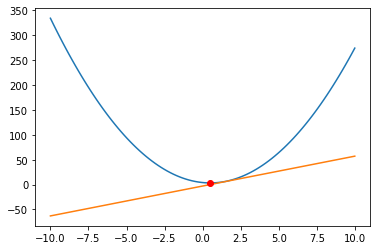

In [73]:
plt.plot(xx,fxx(xx))
plt.plot(xx,dfxx(xx))
plt.plot(critical_x,critical_y, 'ro')
# plt.xlim([-2, 2])



# Gradient Decent using loop

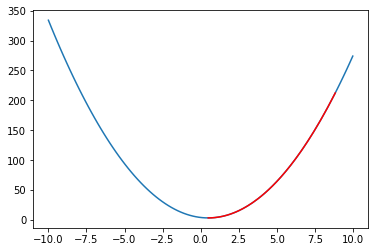

In [89]:
def fx(x):
    return 3 * x**2 - (3* x) + 4

def dfx(x):
    return 6*x - 3

b = np.linspace(-10,10,2001)
learning_epoch = 200
learning_rate = 0.01
# local_min= np.linspace(-2,2,100)
local_min = np.random.choice(b,1)
local_min

l = []
m = []

for i in range(learning_epoch):
    # print(local_min)
    grad = dfx(local_min)
    local_min = local_min - (learning_rate*grad)
    point = fx(local_min)
    # print(local_min)
    l.append(float(local_min))
    m.append(float(point))
local_min

lnp = np.array(l)
mnp = np.array(m)

plt.plot(xx,fxx(xx))
plt.plot(lnp, mnp, color = 'red')


## more gradient decent

In [13]:
x = sym.symbols('x')
y = sym.symbols('y')
b = sym.symbols('b')
a = sym.symbols('a')
y_est = sym.symbols('y_est')
cost = sym.symbols('cost')
n = sym.symbols('n')

In [14]:
y_est = a + (b * x)
cost = (y - y_est)**2

In [15]:
print(sym.diff(cost, b))
print(sym.diff(cost, a))

-2*x*(-a - b*x + y)
2*a + 2*b*x - 2*y


# Excersise

In [90]:
x = sym.symbols('x')

In [91]:
fx = cos(2*math.pi*x)+ x**2
dfx = sym.diff(fx,x)
print(dfx)


2*x - 6.28318530717959*sin(6.28318530717959*x)


In [92]:
fxx = sym.lambdify(x,fx)
dfxx = sym.lambdify(x, dfx)

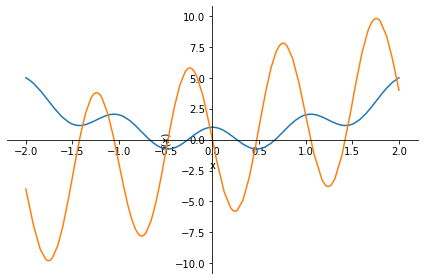

In [93]:
sym.plot(fx, dfx , (x,-2,2))

(-10.0, 10.0)

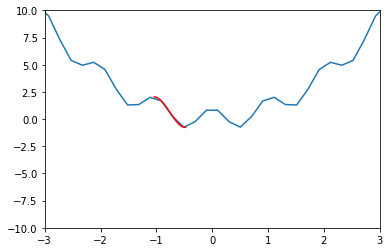

In [104]:
def fx(x):
    return math.cos(2*math.pi*x)+ x**2

def dfx(x):
    return 2*x - 6.28318530717959*math.sin(6.28318530717959*x)

b = np.linspace(-2,2,2001)
learning_epoch = 300
learning_rate = 0.01
# local_min= np.linspace(-2,2,100)
local_min = np.random.choice(b,1)
local_min

l = []
m = []

for i in range(learning_epoch):
    # print(local_min)
    grad = dfx(local_min)
    
    local_min = local_min - (learning_rate*grad)
    point = fx(local_min)
    # print(local_min)
    l.append(float(local_min))
    m.append(float(point))
local_min

lnp = np.array(l)
mnp = np.array(m)

plt.plot(xx,fxx(xx))
plt.plot(lnp, mnp, color = 'red')
plt.xlim(-3,3)
plt.ylim(-10,10)


# Gradient Decent in 2D

In [56]:
x, y = symbols("x y")

In [57]:
# fx = 3*(1-x)**2 * (exp((-x**2)-(y+1)**2)) - (10*((x/5)-(x**3)-(y**5)))*(exp(-x**2)-(y**2)) - 1/3*exp(-(x+1)**2 - y**2)

In [58]:
fx = 3*(1-x)**2 * exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5) * exp(-x**2-y**2) - 1/3*exp(-(x+1)**2 - y**2)

In [59]:
fx

3*(1 - x)**2*exp(-x**2 - (y + 1)**2) - (-10*x**3 + 2*x - 10*y**5)*exp(-x**2 - y**2) - 0.333333333333333*exp(-y**2 - (x + 1)**2)

In [60]:
dfx = sym.diff(fx, x)

In [61]:
dfx_x = sym.diff(fx,x)
dfx_y = sym.diff(fx,y)

In [62]:
# eqs = [dfx_x, dfx_y]
# vars = [x,y]
# sym.solve(eqs, vars)

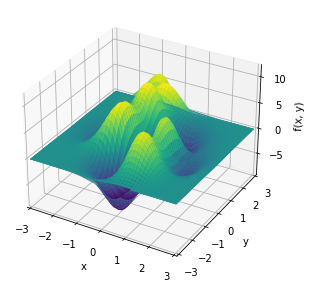

In [63]:
from sympy.plotting import plot3d

plot3d(fx, dfx_x, dfx_y, (x,-3,3), (y,-3,3))

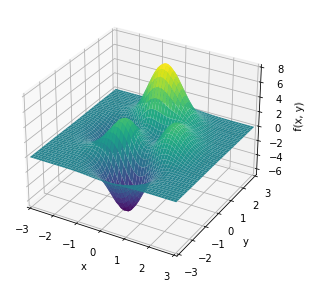

In [29]:
from sympy.plotting import plot3d
plot3d(fx, (x,-3,3), (y,-3,3))

In [30]:
fxx = lambdify([x,y], fx)
dfxx = lambdify([x,y], dfx_x)
dfxy=lambdify([x,y], dfx_y)
xx = np.linspace(-3,3,201)
yy = np.linspace(-3,3,201)
zz = fxx(xx,yy)

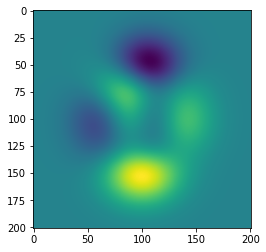

In [31]:
X , Y = np.meshgrid(xx,yy)
Z = fxx(X,Y)
W = dfxx(X,Y)
V = dfxy(X,Y)
plt.imshow(Z)

In [32]:
from mpl_toolkits.mplot3d import *
from matplotlib import *

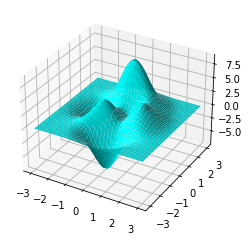

In [33]:
ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,Z, color = 'cyan')
# ax.plot_surface(X,Y,V, color = 'blue')
# ax.plot_surface(X,Y,W, color = 'red')
# ax.plot_surface(X,Y,zero, color = 'red')
ax.scatter(1,1,1, color = 'red')
plt.show()

In [34]:
np.array(fxx(0,0))

array(0.98101184)

# Gradient decent in 3d

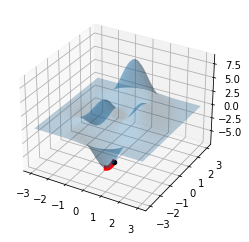

In [35]:
b = np.linspace(-3,3,201)
iteration = 1000
step = 0.01
lmin = np.random.choice(b,2)
startx = lmin[0]
starty = lmin[1]
xl = []
yl = []
zl = []
pl = []
# print(lmin)
# print(startx)
# print(starty)



for i in range(iteration):
    gradx = np.array(dfxx(startx,starty))
    grady = np.array(dfxy(startx,starty))
    startx = startx - (step*gradx)
    starty = starty - (step*grady)
    point = fxx(startx, starty)
    xl.append(startx)
    yl.append(starty)
    zl.append(point)
    # print(lmin)
    # point = np.array(fxx(lmin[0], lmin[1]))
    # print(point)
# lnp = np.array(l)
# mnp = np.array(m)

# x_arr = l_arr[:,0]
# y_arr = l_arr[:,1]
# z_arr = np.array(p)

ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,Z , alpha=0.3)
ax.plot(xl, yl, zl, color = 'red', linewidth=5)
ax.scatter(xl[0], yl[0], zl[0], color = 'black')
plt.show()

# Parametric Experiments - dynamic starting point

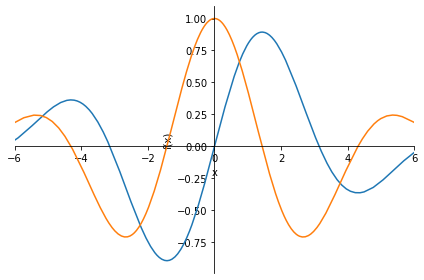

In [36]:
x = sym.symbols('x')
fx = sin(x) * exp(-x**2*.05)
dfx = sym.diff(fx)
sym.plot(fx,dfx,  xlim = (-6,6) , legend = False)

In [37]:
fxx = sym.lambdify(x,fx)
dfxx = sym.lambdify(x,dfx)
xx = np.linspace(-6,6)

In [38]:
dfx

-0.1*x*exp(-0.05*x**2)*sin(x) + exp(-0.05*x**2)*cos(x)

In [39]:
xx

array([-6.        , -5.75510204, -5.51020408, -5.26530612, -5.02040816,
       -4.7755102 , -4.53061224, -4.28571429, -4.04081633, -3.79591837,
       -3.55102041, -3.30612245, -3.06122449, -2.81632653, -2.57142857,
       -2.32653061, -2.08163265, -1.83673469, -1.59183673, -1.34693878,
       -1.10204082, -0.85714286, -0.6122449 , -0.36734694, -0.12244898,
        0.12244898,  0.36734694,  0.6122449 ,  0.85714286,  1.10204082,
        1.34693878,  1.59183673,  1.83673469,  2.08163265,  2.32653061,
        2.57142857,  2.81632653,  3.06122449,  3.30612245,  3.55102041,
        3.79591837,  4.04081633,  4.28571429,  4.53061224,  4.7755102 ,
        5.02040816,  5.26530612,  5.51020408,  5.75510204,  6.        ])

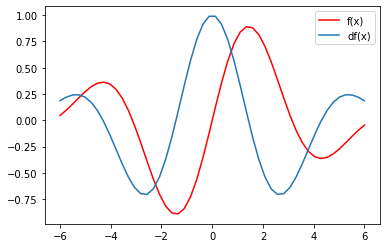

In [40]:
plt.plot(xx, fxx(xx) , color = 'red')
plt.legend('fx')
plt.plot(xx, dfxx(xx))
plt.legend(['f(x)','df(x)'])

-3.0724272804108734


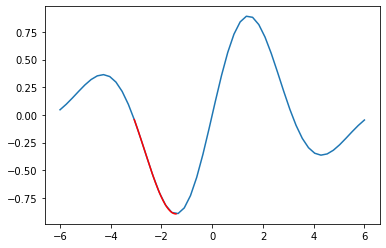

In [41]:
b  = np.linspace(-2*np.pi,2*np.pi,401)

learning_epoch = 1000
learning_rate = 0.01
# local_min= np.linspace(-2,2,100)
local_min = np.random.choice(b,1)
local_min

l = []
m = []

for i in range(learning_epoch):
    # print(local_min)
    grad = dfxx(local_min)
    
    local_min = local_min - (learning_rate*grad)
    point = fxx(local_min)
    # print(local_min)
    l.append(float(local_min))
    m.append(float(point))
    
local_min

lnp = np.array(l)
mnp = np.array(m)

print(min(l))

plt.plot(xx,fxx(xx))
plt.plot(lnp, mnp, color = 'red')

# Dynamic starting point

In [42]:
start_range  = np.linspace(-2*np.pi,2*np.pi,401)

learning_epoch = 1000
learning_rate = 0.01
local_min

l = []
m = []
min_arr = []

for j in start_range:
    local_min = j

    for i in range(learning_epoch):
        # print(local_min)
        grad = dfxx(local_min)
        local_min = local_min - (learning_rate*grad)
        point = fxx(local_min)
        # print(local_min)
        l.append(local_min)
        # m.append(float(point))
        min_arr.append([local_min, point])
        # # .append(point)

min_arr = np.array(min_arr)
ind = np.argmin(min_arr[:,1])
print(min_arr[ind][0])

-1.42886936820998


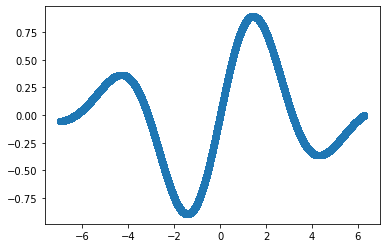

In [43]:
plt.scatter(min_arr[:,0], min_arr[:,1])

-1.428865712457296


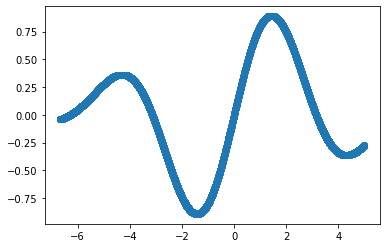

In [44]:
start_range  = np.linspace(-5,5,50)

learning_epoch = 1000
learning_rate = 0.01
local_min

l = []
m = []
min_arr = []

for j in start_range:
    local_min = j

    for i in range(learning_epoch):
        # print(local_min)
        grad = dfxx(local_min)
        local_min = local_min - (learning_rate*grad)
        point = fxx(local_min)
        # print(local_min)
        l.append(local_min)
        # m.append(float(point))
        min_arr.append([local_min, point])
        # # .append(point)

min_arr = np.array(min_arr)
ind = np.argmin(min_arr[:,1])
print(min_arr[ind][0])
plt.scatter(min_arr[:,0], min_arr[:,1])

# Dynamic Learning Rate

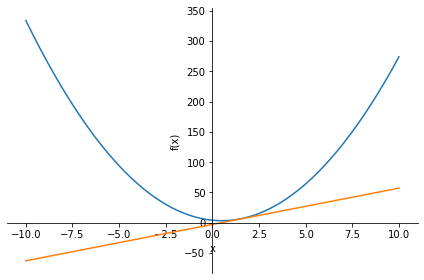

In [45]:
x = sym.symbols('x')
fx = 3*x**2 - 3*x + 4
dfx = sym.diff(fx)
sym.plot(fx,dfx, legend = False)

In [46]:
sym.solve(dfx)

[1/2]

In [47]:
fxx = sym.lambdify(x,fx)
dfxx = sym.lambdify(x,dfx)
xx = np.linspace(-2,2, 2001)

In [48]:
learning_epoch = 50
learning_rate = 0.01
x = np.linspace(-2,2,2001)
local_min = np.random.choice(x,1)

l = []
m = []
min_arr = []
it = 0
iteration = []



for i in range(learning_epoch):
    iter =+1
    # print(local_min)
    grad = dfxx(local_min)
    lr_iter = learning_rate*grad
    local_min = local_min - (lr_iter*grad)
    
    point = fxx(local_min)
    l.append(local_min)
    # m.append(float(point))
    min_arr.append([local_min, point, iter])
    # # .append(point)
    print(local_min , grad)

min_arr = np.array(min_arr)
# ind = np.argmin(min_arr[:,0])
# print(min_arr[ind][1])


[-0.24683584] [-3.672]
[-0.4476308] [-4.48101504]
[-0.77091228] [-5.68578479]
[-1.35239078] [-7.62547371]
[-2.58767735] [-11.11434466]
[-6.01982786] [-18.5260641]
[-21.32276376] [-39.11896715]
[-192.76665035] [-130.93658258]
[-13639.48598012] [-1159.59990211]
[-66991357.79959141] [-81839.91588071]
[-1.61562322e+15] [-4.0194815e+08]
[-9.39685818e+29] [-9.69373931e+15]
[-3.17883397e+59] [-5.63811491e+30]
[-3.63779475e+118] [-1.90730038e+60]
[-4.76407823e+236] [-2.18267685e+119]
[-inf] [-2.85844694e+237]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]
[-inf] [-inf]


<lambdifygenerated-10>:2: RuntimeWarning: overflow encountered in square
  return 3*x**2 - 3*x + 4
/var/folders/_7/8tv1x9sn12bcg2fzw5kp9n7h0000gn/T/ipykernel_24918/221417515.py:19: RuntimeWarning: overflow encountered in multiply
  local_min = local_min - (lr_iter*grad)
/var/folders/_7/8tv1x9sn12bcg2fzw5kp9n7h0000gn/T/ipykernel_24918/221417515.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  min_arr = np.array(min_arr)


In [49]:
min_arr

array([[array([-0.24683584]), array([4.92329132]), 1],
       [array([-0.4476308]), array([5.94401239]), 1],
       [array([-0.77091228]), array([8.0956541]), 1],
       [array([-1.35239078]), array([13.54405477]), 1],
       [array([-2.58767735]), array([31.85125424]), 1],
       [array([-6.01982786]), array([130.77446589]), 1],
       [array([-21.32276376]), array([1431.9490549]), 1],
       [array([-192.76665035]), array([112059.24441472]), 1],
       [array([-13639.48598012]), array([5.58147656e+08]), 1],
       [array([-66991357.79959141]), array([1.34635263e+16]), 1],
       [array([-1.61562322e+15]), array([7.83071515e+30]), 1],
       [array([-9.39685818e+29]), array([2.64902831e+60]), 1],
       [array([-3.17883397e+59]), array([3.03149563e+119]), 1],
       [array([-3.63779475e+118]), array([3.97006519e+237]), 1],
       [array([-4.76407823e+236]), array([inf]), 1],
       [array([-inf]), array([inf]), 1],
       [array([-inf]), array([inf]), 1],
       [array([-inf]), array(

In [50]:
plt.scatter(min_arr[:,0]
plt.set_xlabel('min')
plt.set_ylabel('iter')

SyntaxError: invalid syntax (3481715732.py, line 2)